In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [8]:
score=dataset[['writing score','reading score','math score']]
dataset['TotalScore']=score.sum(axis=1)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<ipython-input-14-7546e24dad0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race/ethnicity',y='TotalScore',data=dataset,palette=['red','yellow','green','blue','brown'])


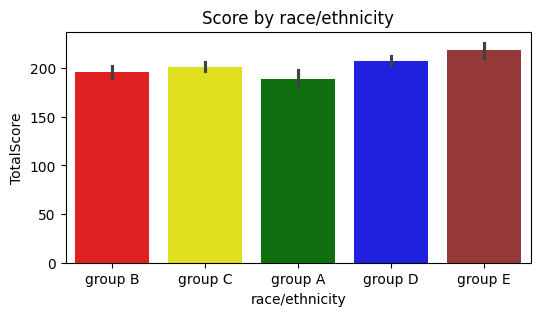

In [14]:
plt.figure(figsize=(6,3))
sns.barplot(x='race/ethnicity',y='TotalScore',data=dataset,palette=['red','yellow','green','blue','brown'])
plt.title("Score by race/ethnicity")
plt.show()

<ipython-input-25-36b673d5fd9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education',y='TotalScore',data=dataset,palette=['red','yellow','green','blue','brown','violet'])


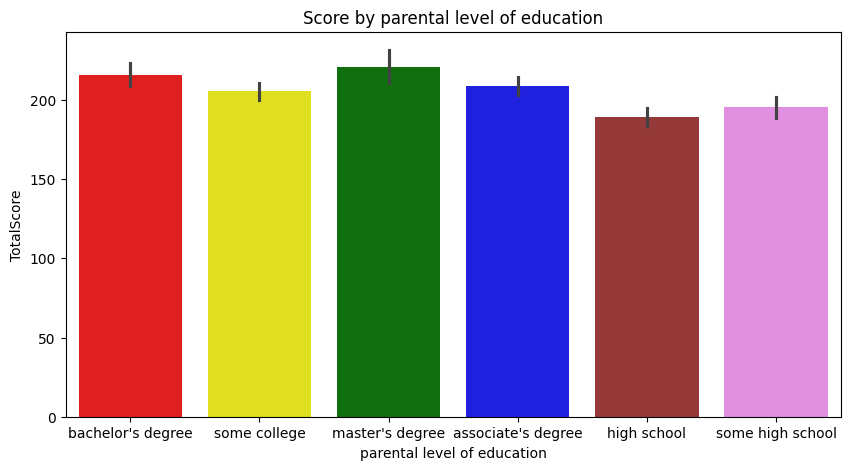

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education',y='TotalScore',data=dataset,palette=['red','yellow','green','blue','brown','violet'])
plt.title("Score by parental level of education")
plt.show()

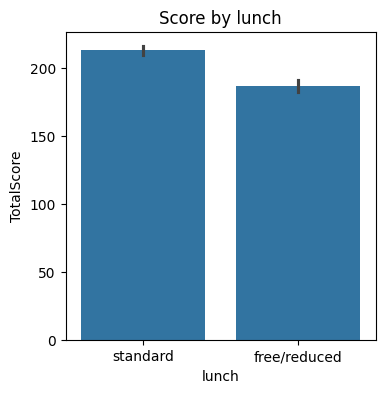

In [27]:
plt.figure(figsize=(4,4))
sns.barplot(x='lunch',y='TotalScore',data=dataset)
plt.title('Score by lunch')
plt.show()


In [28]:
dataset['TotalScore'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: TotalScore, dtype: float64

**Encoding Nominal Variable**

 #pandas get_dummies approach

In [29]:
gen=pd.get_dummies(dataset['gender'])
gen

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [30]:
dataset1=pd.concat([dataset,gen],axis=1)
dataset1.drop(['gender','female'],inplace=True,axis=1)
dataset1.head()



,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore,male
0,group B,bachelor's degree,standard,none,72,72,74,218,0
1,group C,some college,standard,completed,69,90,88,247,0
2,group B,master's degree,standard,none,90,95,93,278,0
3,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,group C,some college,standard,none,76,78,75,229,1


 #using OneHotEncoder

In [34]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(sparse_output=False)

In [35]:
gen2=one.fit_transform(dataset[['gender']])
one.categories_

[array(['female', 'male'], dtype=object)]

In [36]:
gen2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Encoding Ordinal Variable

In [45]:
c=print(dataset['parental level of education'].unique().tolist())

["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']


In [50]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[c])

In [ ]:
edu=oe.fit_transform(dataset['parental level of education'])
oe.categories_

In [61]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['gender','race/ethnicity','lunch','test prepaation']),
 ('oe',OrdinalEncoder(categories=[c]),['parental level of education'])],remainder='passthrough')

In [63]:
dataset2=ct.fit_transform(dataset)
